In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
df = pd.read_csv('books.csv')

FileNotFoundError: ignored

In [3]:
df.sort_values(by='ratings_count', ascending=False)
df.drop(columns=['isbn', 'isbn13'])
df.head()

NameError: ignored

In [ ]:
rating_over_10k = df['ratings_count'] >= 10000
df2 = df.loc[rating_over_10k]
df2 = df2.sort_values(by='average_rating',ascending=False)
df2.drop(columns=['isbn','isbn13'], inplace=True)
df2.head(10)

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
6587,24812,The Complete Calvin and Hobbes,Bill Watterson,4.82,eng,1456,32213,930,9/6/2005,Andrews McMeel Publishing
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic
6589,24814,It's a Magical World (Calvin and Hobbes #11),Bill Watterson,4.76,eng,176,23875,303,9/1/1996,Andrews McMeel Publishing
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,eng,3342,28242,808,9/12/2005,Scholastic
6590,24816,Homicidal Psycho Jungle Cat (Calvin and Hobbes...,Bill Watterson,4.72,eng,176,15365,290,9/6/1994,Andrews McMeel Publishing
6591,24818,The Days Are Just Packed,Bill Watterson,4.69,eng,176,20308,244,9/1/1993,Andrews McMeel Publishing
6294,23753,The Absolute Sandman Volume One,Neil Gaiman/Mike Dringenberg/Chris Bachalo/Mic...,4.65,eng,612,15640,512,11/1/2006,Vertigo
6588,24813,The Calvin and Hobbes Tenth Anniversary Book,Bill Watterson,4.63,eng,208,49122,368,9/5/1995,Andrews McMeel Publishing
72,119,The Lord of the Rings: The Art of the Fellowsh...,Gary Russell,4.59,eng,192,26153,102,6/12/2002,Houghton Mifflin Harcourt
21,30,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,4.59,eng,1728,101233,1550,9/25/2012,Ballantine Books


In [ ]:
# Qual a média de cada idioma
# Qual o melhor livro de cada ano
# Qual o autor com melhor média
# Qual o autor com mais livros publicados

In [ ]:
# Books with best average
df2.iloc[0:5]

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
6587,24812,The Complete Calvin and Hobbes,Bill Watterson,4.82,eng,1456,32213,930,9/6/2005,Andrews McMeel Publishing
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic
6589,24814,It's a Magical World (Calvin and Hobbes #11),Bill Watterson,4.76,eng,176,23875,303,9/1/1996,Andrews McMeel Publishing
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,eng,3342,28242,808,9/12/2005,Scholastic
6590,24816,Homicidal Psycho Jungle Cat (Calvin and Hobbes...,Bill Watterson,4.72,eng,176,15365,290,9/6/1994,Andrews McMeel Publishing


In [ ]:
# Most voted books
most_reviewed = df2.sort_values(by='ratings_count',ascending=False).iloc[0:5]
most_reviewed

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
10336,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,eng,501,4597666,94265,9/6/2006,Little Brown and Company
1697,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,eng,366,2530894,32871,8/15/2002,Houghton Mifflin
1462,5107,The Catcher in the Rye,J.D. Salinger,3.80,eng,277,2457092,43499,1/30/2001,Back Bay Books
307,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,eng,736,2418736,21303,4/1/2006,Pocket Books
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.


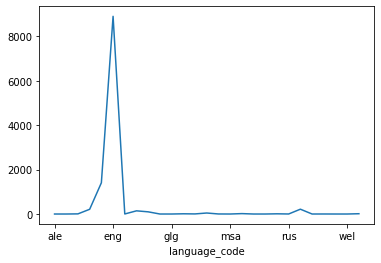

In [ ]:
# Books by language
language = df.groupby(['language_code'])['language_code'].count()
language.plot()